In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
def cosine(x):
    return (numpy.cos(3 * x) + 1) / 2

def gaussian(x):
    return numpy.exp(-0.25 * x ** 2)

def polynomial(x):
    return (x ** 5 + 3 * x ** 4 - 11 * x ** 3 - 27 * x ** 2 + 10 * x + 64) / 100 

def sigmoid(x):
    return 1. / (1 + numpy.exp(-x))

def loss_function(y, t): # L2 Loss
    return numpy.mean((y - t) ** 2)

def network_output(x, w_1, w_2):
    h = sigmoid(w_1.dot(x))
    h[0] = 1. # bias
    y = w_2.dot(h)
    return y, h

def compute_gradient_layer_1(x, w, h, y, t):
    tmp = numpy.outer(w, y - t) * h * (1 - h)
    return tmp.dot(x.T) / len(x)

def compute_gradient_layer_2(h, y, t):
    return numpy.mean((y - t) * h, axis=1)

def gradient_descent(x, t, w_1, w_2, eta, epochs):
    loss_array = numpy.zeros(epochs)
    
    for epoch in range(epochs):
        y, h = network_output(x, w_1, w_2)
        w_1 -= eta * compute_gradient_layer_1(x, w_2, h, y, t)
        w_2 -= eta * compute_gradient_layer_2(h, y, t)
        y, h = network_output(x, w_1, w_2)
        loss_array[epoch] = loss_function(y, t)
    
    return w_1, w_2, loss_array

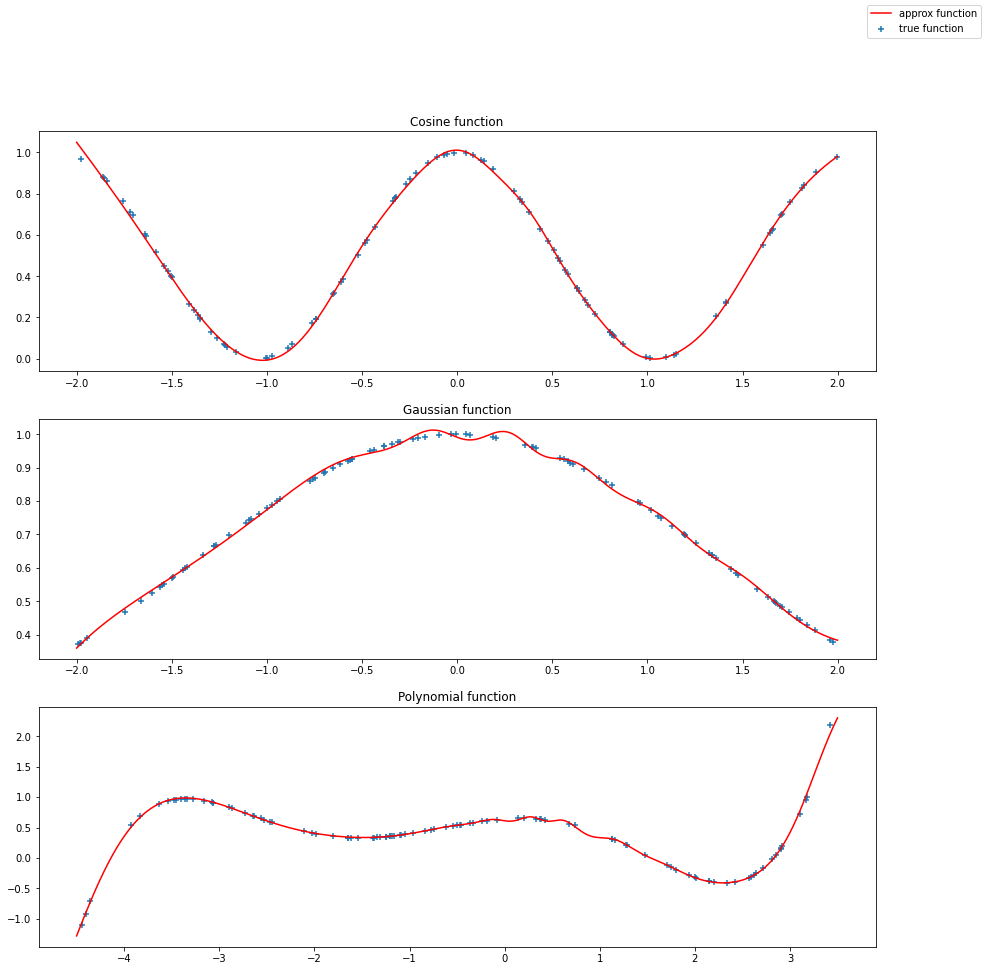

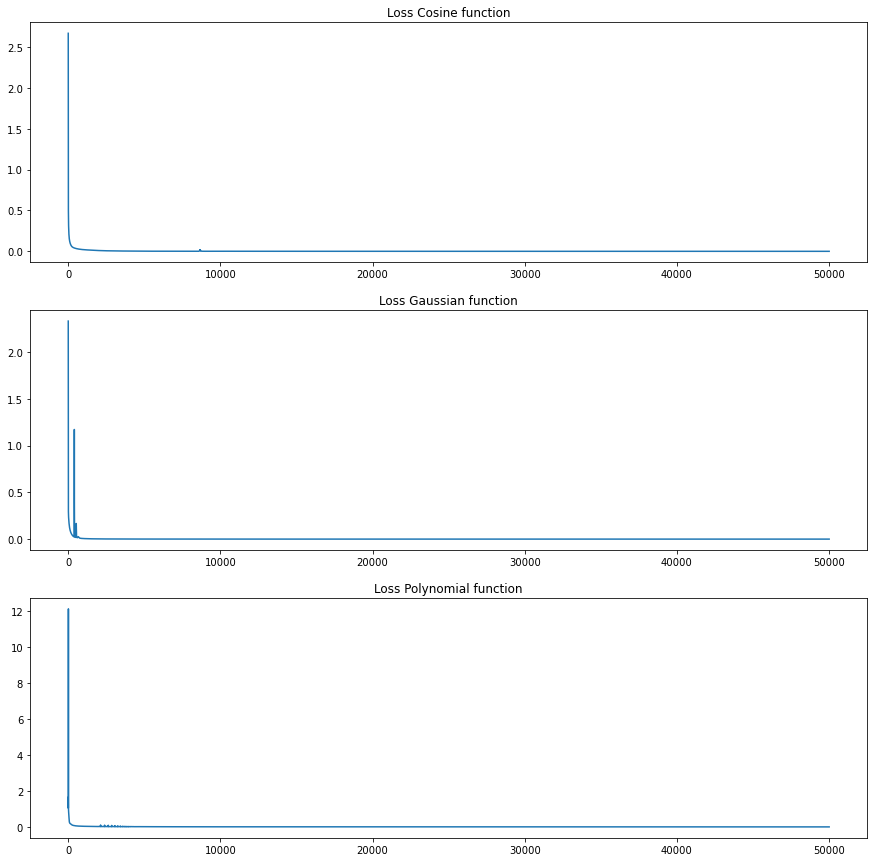

In [3]:
# define number of samples
n = 100

# datasets
x_1 = numpy.random.uniform(low=-2, high=2, size=(2,n))
x_1[0] = 1. # add bias
t_1 = cosine(x_1[1,:])

x_2 = numpy.random.uniform(low=-2, high=2, size=(2,n))
x_2[0] = 1. # add bias
t_2 = gaussian(x_2[1,:])

x_3 = numpy.random.uniform(low=-4.5, high=3.5, size=(2,n))
x_3[0] = 1. # add bias
t_3 = polynomial(x_3[1,:])

# init weights
k = 20 # number of hidden neurons
w_1 = numpy.random.uniform(low=-10, high=10, size=(k+1,2)) # first layer weights
w_2 = numpy.random.uniform(low=-10, high=10, size=(k+1)) # second layer weights

# learning rate
eta = 0.01

# number of epochs
epochs = 50000

# run gradient descent for x_1 dataset
w_x_1_1, w_x_1_2, loss_1 = gradient_descent(x_1, t_1, numpy.copy(w_1), numpy.copy(w_2), eta, epochs)

# run gradient descent for x_3 dataset
w_x_2_1, w_x_2_2, loss_2 = gradient_descent(x_2, t_2, numpy.copy(w_1), numpy.copy(w_2), eta, epochs)

# run gradient descent for x_3 dataset
w_x_3_1, w_x_3_2, loss_3 = gradient_descent(x_3, t_3, numpy.copy(w_1), numpy.copy(w_2), eta, epochs)

# compute the network outputs
x_1_new = numpy.arange(-2,2,0.001)
x_1_new = numpy.vstack((numpy.ones(x_1_new.shape), x_1_new)) # add bias
y_1 = network_output(x_1_new, w_x_1_1, w_x_1_2)[0]

x_2_new = numpy.arange(-2,2,0.001)
x_2_new = numpy.vstack((numpy.ones(x_2_new.shape), x_2_new)) # add bias
y_2 = network_output(x_2_new, w_x_2_1, w_x_2_2)[0]

x_3_new = numpy.arange(-4.5,3.5,0.001)
x_3_new = numpy.vstack((numpy.ones(x_3_new.shape), x_3_new)) # add bias
y_3 = network_output(x_3_new, w_x_3_1, w_x_3_2)[0]


# plot the graphs
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
ax1.scatter(x_1[1,:], t_1, marker='+')
ax1.plot(x_1_new[1,:], y_1,'r-')
ax1.title.set_text('Cosine function')
ax2.scatter(x_2[1,:], t_2, marker='+')
ax2.plot(x_2_new[1,:], y_2,'r-')
ax2.title.set_text('Gaussian function')
ax3.scatter(x_3[1,:], t_3, marker='+')
ax3.plot(x_3_new[1,:], y_3,'r-')
ax3.title.set_text('Polynomial function')
fig.legend(['approx function','true function'])

# plot the loss functions
x = numpy.arange(0,epochs)
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
ax1.plot(x, loss_1)
ax1.title.set_text('Loss Cosine function')
ax2.plot(x, loss_2)
ax2.title.set_text('Loss Gaussian function')
ax3.plot(x, loss_3)
ax3.title.set_text('Loss Polynomial function')